In [27]:
import torch
import fastai

In [7]:
!git clone https://github.com/EscVM/OIDv4_Toolkit.git

Cloning into 'OIDv4_Toolkit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 26.08 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [11]:
!cd OIDv4_Toolkit && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [12]:
!cd OIDv4_Toolkit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 45651 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [14]:
from fastai.vision.all import *
from ipywidgets import widgets

In [16]:
path = Path('train')
path.ls()

(#3) [Path('train/Car'),Path('train/Boat'),Path('train/Airplane')]

In [29]:
#DataBlock

transports = DataBlock(
      blocks=(ImageBlock, CategoryBlock),
      get_items=get_image_files,
      splitter = RandomSplitter(valid_pct=0.2, seed=42),
      get_y = parent_label,
      item_tfms = Resize(224)
)

In [30]:
#DataLoader
dls = transports.dataloaders(path)

In [31]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.272095,0.270145,0.891667,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.331971,0.288811,0.891667,00:08
1,0.243962,0.343795,0.900000,00:09
2,0.183172,0.353817,0.883333,00:09
3,0.134047,0.345979,0.875000,00:08


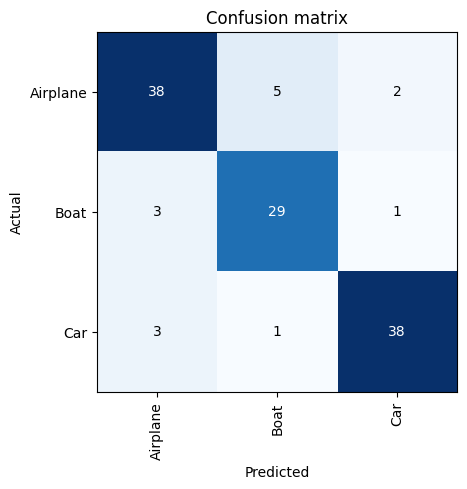

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

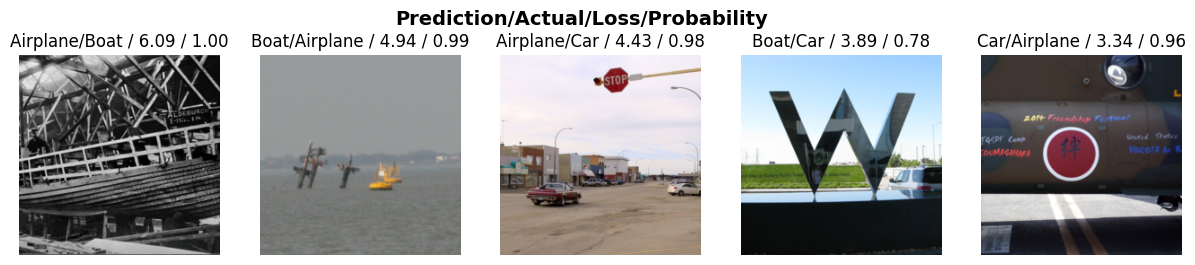

In [33]:
interp.plot_top_losses(5, nrows=1)

In [34]:
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

Prediction is Boat
Ehtimollik is 0.9999960660934448


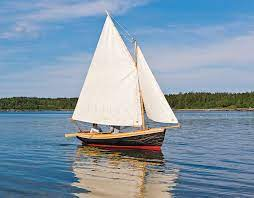

In [38]:
img = PILImage.create(uploader.data[-1])
pred,pred_id, probs = learn.predict(img)
print(f"Prediction is {pred}")
print(f'Ehtimollik is {probs[pred_id]}')
img